In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('iris.data')
df['Iris-setosa'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
df.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
print(df['class'].unique)

<bound method Series.unique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: class, Length: 149, dtype: object>


In [4]:
df.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df["class"] = df['class'].apply(lambda x: (1 if x=="Iris-versicolor" else 0))

In [5]:
df

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,0
145,6.3,2.5,5.0,1.9,0
146,6.5,3.0,5.2,2.0,0
147,6.2,3.4,5.4,2.3,0


In [6]:
df.isna()
df.dropna()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,0
145,6.3,2.5,5.0,1.9,0
146,6.5,3.0,5.2,2.0,0
147,6.2,3.4,5.4,2.3,0


In [7]:
df_filtered=df

In [8]:
print(len(df_filtered[df_filtered['class'] == 1]))

50


In [9]:
for column in list(df_filtered.columns)[:-1]:
    df_filtered[column] = df_filtered[column].astype(float)

In [10]:
df_filtered=(df_filtered-df_filtered.min())/(df_filtered.max()-df_filtered.min())

In [11]:
X = df_filtered[["sepal length", "sepal width", "petal length", "petal width"]].values

In [12]:
Y = df_filtered[['class']].values

In [13]:
def evaluate(model,X_train,y_train,labels=[0,1]):
    distances, indices = model.kneighbors(X_train)
    y_pred=[]
    for i in range(len(X_train)):
        nearest_neighbours=indices[i]
        versicolor=0
        nonversicolor=0
        for neighbour in nearest_neighbours:
            if y_train[neighbour]==1:
                versicolor+=1
            else:
                nonversicolor+=1
        if versicolor>nonversicolor:
            y_pred.append(1)
        else:
            y_pred.append(0)
    (p,r,f,s) = precision_recall_fscore_support(y_train.values, y_pred, labels=[0, 1])
    return (p,r,f,s)

In [14]:
def test(model,y_train,X_test,y_test,labels=[0,1]):
    distances, indices = model.kneighbors(X_test)
    y_pred=[]
    for i in range(len(X_test)):
        nearest_neighbours=indices[i]
        versicolor=0
        nonversicolor=0
        for neighbour in nearest_neighbours:
            if y_train[neighbour]==1:
                versicolor+=1
            else:
                nonversicolor+=1
        if versicolor>nonversicolor:
            y_pred.append(1)
        else:
            y_pred.append(0)
    (p,r,f,s) = precision_recall_fscore_support(y_test.values, y_pred, labels=[0, 1])
    return (p,r,f,s)

In [15]:
import warnings
warnings.filterwarnings('ignore')

best_f_score_model=[0,0]
for i in range(2,10):
    kfold = KFold(10)
    nn = NearestNeighbors(n_neighbors=i, metric='euclidean', algorithm='auto')
    for train, test in kfold.split(X,Y):
        X_train,y_train = df_filtered[["sepal length", "sepal width", "petal length", "petal width"]].iloc[train], df_filtered[['class']].iloc[train]
        X_test,y_test=df_filtered[["sepal length", "sepal width", "petal length", "petal width"]].iloc[test], df_filtered[['class']].iloc[test]

        model=nn.fit(X_train.values)
        distances, indices = model.kneighbors(X_test.values)
        y_pred=[]
        for i in range(len(X_test.values)):
            nearest_neighbours=indices[i]
            versicolor=0
            nonversicolor=0
            for neighbour in nearest_neighbours:
                if y_train.values[neighbour]==1:
                    versicolor+=1
                else:
                    nonversicolor+=1
            if versicolor>nonversicolor:
                y_pred.append(1)
            else:
                y_pred.append(0)
        (p,r,f,s) = precision_recall_fscore_support(y_test.values, y_pred, labels=[0,1])

        if best_f_score_model[0]<f[0]:
            best_f_score_model[0]=max(best_f_score_model[0],f[0])
            best_f_score_model[1]=i

In [16]:
best_f_score_model

[1.0, 14]

In [17]:
scores_for_k_value=[]
best_f_score_model=[0,0]
for i in range(2,len(X)//2):
    sample_score_array=[]
    kfold = KFold(10)
    nn = NearestNeighbors(n_neighbors=i, metric='euclidean', algorithm='auto')
    for train, test in kfold.split(X,Y):
        X_train,y_train = df_filtered[["sepal length", "sepal width", "petal length", "petal width"]].iloc[train], df_filtered[['class']].iloc[train]
        X_test,y_test=df_filtered[["sepal length", "sepal width", "petal length", "petal width"]].iloc[test], df_filtered[['class']].iloc[test]
        model=nn.fit(X_train.values)
        distances, indices = model.kneighbors(X_test.values)
        y_pred=[]
        for i in range(len(X_test.values)):
            nearest_neighbours=indices[i]
            versicolor=0
            nonversicolor=0
            for neighbour in nearest_neighbours:
                if y_train.values[neighbour]==1:
                    versicolor+=1
                else:
                    nonversicolor+=1
            if versicolor>nonversicolor:
                y_pred.append(1)
            else:
                y_pred.append(0)
                
        (p,r,f,s) = precision_recall_fscore_support(y_test.values, y_pred, labels=[0, 1])
        sample_score_array.append((p,r,f,s))

        print(f'precision={p}, recall={r}, f-score={f}, support={s}')
        if best_f_score_model[0]<f[0]:
            best_f_score_model[0]=max(best_f_score_model[0],f[0])
            best_f_score_model[1]=i
    scores_for_k_value.append(sample_score_array)

precision=[1. 0.], recall=[1. 0.], f-score=[1. 0.], support=[15  0]
precision=[1. 0.], recall=[1. 0.], f-score=[1. 0.], support=[15  0]
precision=[1. 0.], recall=[1. 0.], f-score=[1. 0.], support=[15  0]
precision=[0.8 1. ], recall=[1.         0.90909091], f-score=[0.88888889 0.95238095], support=[ 4 11]
precision=[0. 1.], recall=[0.  0.8], f-score=[0.         0.88888889], support=[ 0 15]
precision=[0. 1.], recall=[0.         0.86666667], f-score=[0.         0.92857143], support=[ 0 15]
precision=[1. 1.], recall=[1. 1.], f-score=[1. 1.], support=[6 9]
precision=[1. 0.], recall=[0.86666667 0.        ], f-score=[0.92857143 0.        ], support=[15  0]
precision=[1. 0.], recall=[0.86666667 0.        ], f-score=[0.92857143 0.        ], support=[15  0]
precision=[1. 0.], recall=[1. 0.], f-score=[1. 0.], support=[14  0]
precision=[1. 0.], recall=[1. 0.], f-score=[1. 0.], support=[15  0]
precision=[1. 0.], recall=[1. 0.], f-score=[1. 0.], support=[15  0]
precision=[1. 0.], recall=[1. 0.], f-s

In [18]:
median_scores=[]
for k_measure_array in scores_for_k_value:
    f1_scores_internal=[]
    for scores in k_measure_array:
            f1_scores_internal.append(scores[2][0])
            f1_scores_internal.sort()
    median_scores.append((f1_scores_internal[4]+f1_scores_internal[5])/2)

In [19]:
for i in range(1,len(median_scores)):
    print(i+1,median_scores[i])

2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 0.9814814814814815
13 0.9814814814814815
14 0.9814814814814815
15 1.0
16 1.0
17 0.9642857142857143
18 0.9642857142857143
19 0.9642857142857143
20 0.9457671957671958
21 0.9457671957671958
22 0.9258241758241759
23 0.9457671957671958
24 0.9258241758241759
25 0.9457671957671958
26 0.9258241758241759
27 0.9457671957671958
28 0.9457671957671958
29 0.9457671957671958
30 0.9457671957671958
31 0.9457671957671958
32 0.9457671957671958
33 0.9457671957671958
34 0.905982905982906
35 0.905982905982906
36 0.905982905982906
37 0.905982905982906
38 0.8844444444444445
39 0.8844444444444445
40 0.8844444444444445
41 0.8844444444444445
42 0.8611111111111112
43 0.8611111111111112
44 0.8611111111111112
45 0.8611111111111112
46 0.8611111111111112
47 0.8611111111111112
48 0.8611111111111112
49 0.8611111111111112
50 0.8611111111111112
51 0.8611111111111112
52 0.8611111111111112
53 0.8611111111111112
54 0.8357487922705314
55 0.8357487922705314
56 0

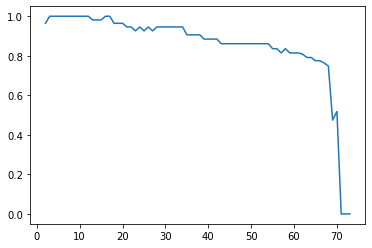

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(2,len(X)//2),median_scores)
plt.savefig("img3.png")

In [21]:
f1_scores=[]
for k_measure_array in scores_for_k_value:
    score_sum=0
    for scores in k_measure_array:
            score_sum+=scores[2][0]
    score_sum/=10
    f1_scores.append(score_sum)

In [22]:
for i in range(1,len(f1_scores)):
    print(i+1,f1_scores[i])

2 0.7817460317460319
3 0.7857142857142858
4 0.7857142857142858
5 0.7857142857142858
6 0.7817460317460319
7 0.7857142857142858
8 0.7817460317460319
9 0.7857142857142858
10 0.7857142857142858
11 0.7857142857142858
12 0.782010582010582
13 0.782010582010582
14 0.782010582010582
15 0.7857142857142858
16 0.7857142857142858
17 0.7746031746031747
18 0.7746031746031747
19 0.7746031746031747
20 0.766931216931217
21 0.766931216931217
22 0.7629426129426131
23 0.766931216931217
24 0.7586691086691087
25 0.7626577126577126
26 0.7586691086691087
27 0.7537688237688237
28 0.7580423280423281
29 0.7491534391534391
30 0.7491534391534391
31 0.7491534391534391
32 0.7441534391534391
33 0.7441534391534391
34 0.7361965811965813
35 0.7361965811965813
36 0.7361965811965813
37 0.7411965811965813
38 0.7318888888888889
39 0.7318888888888889
40 0.7318888888888889
41 0.7318888888888889
42 0.7272222222222222
43 0.719949494949495
44 0.7272222222222222
45 0.7272222222222222
46 0.7272222222222222
47 0.719949494949495
48 0

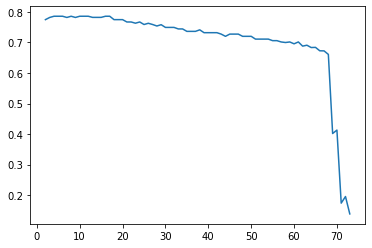

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(2,len(X)//2),f1_scores)
plt.savefig("img4.png")

In [24]:
X = df_filtered[["sepal length", "sepal width", "petal length", "petal width"]].values
Y=df_filtered['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42)
model= NearestNeighbors(n_neighbors=7, metric='euclidean', algorithm='auto').fit(X_train)
distances, indices = model.kneighbors(X_test)
y_pred=[]
for i in range(len(X_test)):
    nearest_neighbours=indices[i]
    versicolor=0
    nonversicolor=0
    for neighbour in nearest_neighbours:
        if y_train[neighbour]==1:
            versicolor+=1
        else:
            nonversicolor+=1
    if versicolor>nonversicolor:
        y_pred.append(1)
    else:
        y_pred.append(0)
(p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, labels=[0,1])

In [25]:
p,r,f,s

(array([0.9, 1. ]),
 array([1.        , 0.83333333]),
 array([0.94736842, 0.90909091]),
 array([9, 6]))

In [26]:
print("accuracy is ", f[0])

accuracy is  0.9473684210526316
